# EOSC 573 - Final Project - analysis of CTD Data + drifter tracks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import scipy.io as spio
import gsw

In [2]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [3]:
df = pd.read_csv('CTDcrosssection.csv',index_col=0)
df = df.sort_values(by=['transect', 'station','pressure'],ignore_index=True)

In [4]:
#lets add a density column
df['density']=gsw.density.rho_t_exact(df.salinity, df.temperature, df.pressure)
df

,transect,station,lat,lon,depth,temperature,salinity,pressure,seadepth,density
0,T1,S1,49.3163,-123.1365,19.7,7.542696,27.461443,0.75,0.576803,1021.322756
1,T1,S1,49.3163,-123.1365,19.7,7.571068,27.662969,1.25,1.336883,1021.478877
2,T1,S1,49.3163,-123.1365,19.7,7.578932,27.692867,1.75,1.707430,1021.503541
3,T1,S1,49.3163,-123.1365,19.7,7.581245,27.781558,2.25,2.190382,1021.574832
4,T1,S1,49.3163,-123.1365,19.7,7.593192,27.858558,2.75,2.686998,1021.635757
...,...,...,...,...,...,...,...,...,...,...
1712,T6,S5,49.3122,-123.1721,28.9,8.223764,29.298585,24.75,24.574700,1022.776695
1713,T6,S5,49.3122,-123.1721,28.9,8.234730,29.318648,25.25,25.074019,1022.793110
1714,T6,S5,49.3122,-123.1721,28.9,8.242642,29.322720,25.75,25.561849,1022.797482
1715,T6,S5,49.3122,-123.1721,28.9,8.243155,29.333838,26.25,26.028045,1022.808378


### Temperature and Salinity Profiles

In [5]:
Dmin = 1020.9
Dmax = 1023.4
levels = np.linspace(Dmin,Dmax, 21)

#### Transect 1

In [6]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T1']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T1']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T1']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T1']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T1']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T1']

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T1']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T1']))

/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


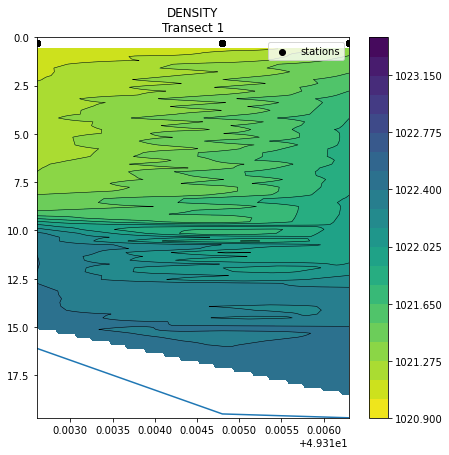

In [7]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)

# #SALINITY
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect 5')

# #TEMPERATURE
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect 5')

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 1')
plt.scatter(lat,top, c='k', label='stations')
plt.legend()

#### Transect 2

In [8]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T2']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T2']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T2']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T2']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T2']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T2']
print(len(top))

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T2']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T2']))

286


/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


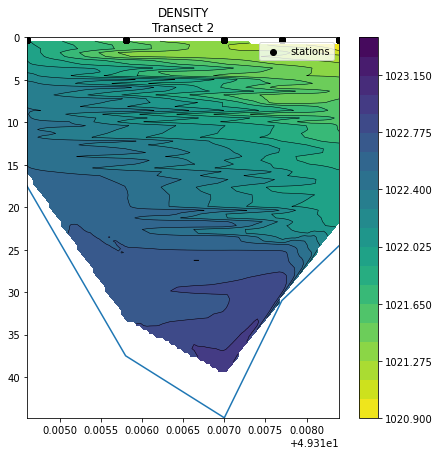

In [9]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)


#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 2')
plt.scatter(lat,top, c='k', label='stations')
plt.legend()

# #SALINITY
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect1')

# #TEMPERATURE

# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect1')

#### Transect 3

In [10]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T3']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T3']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T3']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T3']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T3']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T3']

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T3']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T3']))

/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  


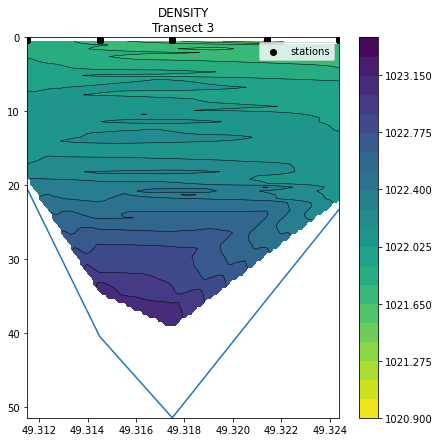

In [11]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 3')
plt.scatter(lat,top, c='k', label='stations')
plt.legend()

# #SALINITY
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect 3')

# #TEMPERATURE
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect 3')

#### Transect 4

In [12]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T4']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T4']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T4']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T4']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T4']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T4']

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T4']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T4']))

/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  


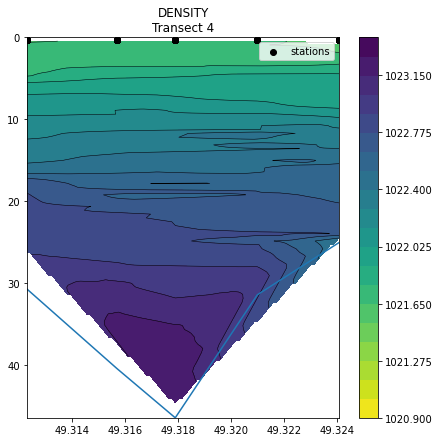

In [13]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 4')

plt.scatter(lat,top, c='k', label='stations')
plt.legend()

#SALINITY 
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect 2')

# #TEMPERATURE
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect 2')

#### Transect 6

In [14]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T6']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T6']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T6']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T6']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T6']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T6']

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T6']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T6']))

/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  


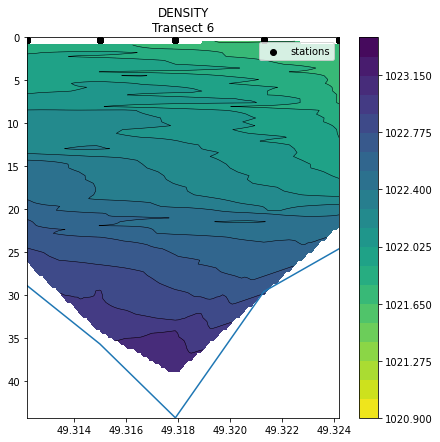

In [15]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 6')

plt.scatter(lat,top, c='k', label='stations')
plt.legend()

# #SALINITY
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect 2b')

# #TEMPERATURE
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect 2b')

#### Transect 5

In [16]:
salinity = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T5']
temperature = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T5']
density = [df.density[i] for i in range(len(df)) if df.transect[i]=='T5']
seadepth = [df.seadepth[i] for i in range(len(df)) if df.transect[i]=='T5']
lat = [df.lat[i] for i in range(len(df)) if df.transect[i]=='T5']
top = [0.3 for i in range(len(df)) if df.transect[i]=='T5']

bottomdepth = list(dict.fromkeys([df.depth[i] for i in range(len(df)) if df.transect[i]=='T5']))
bottomlat = list(dict.fromkeys([df.lat[i] for i in range(len(df)) if df.transect[i]=='T5']))

/home/rbeutel/anaconda3/envs/eosc573/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  


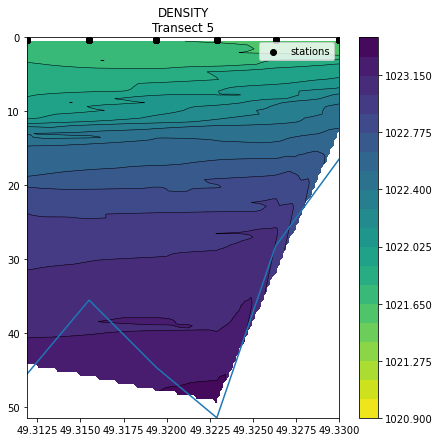

In [17]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(lat),max(lat), ngridx)
yi = np.linspace(0, max(bottomdepth), ngridy)

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((lat, seadepth), density, (xi[None, :], yi[:, None]), method='linear')

plt.figure(figsize=(7,7))
plt.contour(xi, yi, zi, levels, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels, cmap="viridis_r")
plt.colorbar(boundaries=np.linspace(Dmin, Dmax, 21))
#depth
plt.plot(bottomlat, bottomdepth)
plt.axis([min(lat),max(lat),max(bottomdepth),0])
plt.title('DENSITY\nTransect 5')

plt.scatter(lat,top, c='k', label='stations')
plt.legend()

# #SALINITY
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), salinity, (xi[None, :], yi[:, None]), method='linear')

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('SALINITY\nTransect 4')

# #TEMPERATURE
# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((lat, seadepth), temperature, (xi[None, :], yi[:, None]), method='linear')

# plt.subplot(1,2,2)
# plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
# plt.colorbar()
# #depth
# plt.plot(bottomlat, bottomdepth)
# plt.axis([min(lat),max(lat),max(bottomdepth),0])
# plt.title('TEMPERATURE\nTransect 4')

### Drifters

In [5]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [6]:
drift = loadmat('/ocean/kstankov/driftersL1L2L3/L2/drifters_L2_32_Burrard.mat')['drift']
drift[0]._fieldnames

['id', 'deviceid', 'design', 'tzone', 'mtime', 'lon', 'lat', 'UTCtime']

In [7]:
# drift[0].lat = drift[0].lat[:-1]
# drift[0].lon = drift[0].lon[:-1]
# drift[0].UTCtime = drift[0].UTCtime[:-1]
# drift[1].lat = drift[1].lat[10:]
# drift[1].lon = drift[1].lon[10:]
# drift[1].UTCtime = drift[1].UTCtime[10:]
# drift[2].lat = drift[2].lat[1:]
# drift[2].lon = drift[2].lon[1:]
# drift[2].UTCtime = drift[2].UTCtime[1:]

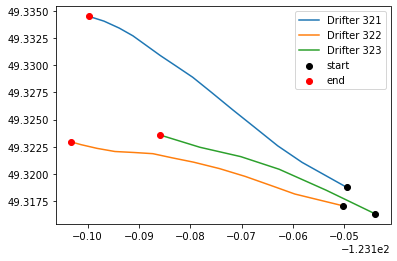

In [10]:
plt.plot(drift[2].lon,drift[2].lat,label='Drifter '+str(drift[2].id),zorder=1)
plt.plot(drift[0].lon,drift[0].lat,label='Drifter '+str(drift[0].id),zorder=1)
plt.plot(drift[1].lon,drift[1].lat,label='Drifter '+str(drift[1].id),zorder=1)
plt.scatter([drift[2].lon[0],drift[0].lon[0],drift[1].lon[0]],[drift[2].lat[0],drift[0].lat[0],drift[1].lat[0]],c='k', label='start',zorder=2)
plt.scatter([drift[2].lon[-1],drift[0].lon[-1],drift[1].lon[-1]],[drift[2].lat[-1],drift[0].lat[-1],drift[1].lat[-1]],c='r', label='end',zorder=2)
plt.legend()

### Geostrophy Calcs - depth of 0.75 dB
calc the velocity AND dynamic height at the surface and show taht plot - def <br>
calc velocity at eery depth and show cross sections - maybe

In [11]:
#calc dynamic height seperately for each profile as p must be increasing for gsw to calc it

kk = [1,2,3,4,5,6] #transect number
nSt = [3,5,5,5,6,5] #number of station in each transect
stream = []
a=[]

for k in kk:
    for l in range(nSt[k-1]):
        S = [df.salinity[i] for i in range(len(df)) if df.transect[i]=='T'+str(k) and df.station[i]=='S'+str(l+1)]
        T = [df.temperature[i] for i in range(len(df)) if df.transect[i]=='T'+str(k) and df.station[i]=='S'+str(l+1)]
        P = [df.pressure[i] for i in range(len(df)) if df.transect[i]=='T'+str(k) and df.station[i]=='S'+str(l+1)]
        CT = gsw.CT_from_t(S, T, P)
        
        refP = 10 #15 m reference depth
        a +=list(P)
        stream += list(gsw.geostrophy.geo_strf_dyn_height(S, CT, P, p_ref=refP, axis=0, max_dp=1.0))
#lets add a dynamic height column
df['Stream Function']=stream
df;

In [12]:
#create a new data frame with ONLY info from a depth of 0.75 dB
surface = pd.DataFrame({'transect': [df.transect[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'station': [df.station[i] for i in range(len(df)) if df.pressure[i]==0.75], 
         'lat': [df.lat[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'lon': [df.lon[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'depth': [df.depth[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'temperature': [df.temperature[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'salinity': [df.salinity[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'pressure':[df.pressure[i] for i in range(len(df)) if df.pressure[i]==0.75],
         'stream':[df['Stream Function'][i] for i in range(len(df)) if df.pressure[i]==0.75],
         'seadepth': [df.seadepth[i] for i in range(len(df)) if df.pressure[i]==0.75]})
surface;

In [13]:
burrard = loadmat('PNW.mat')

x= burrard['ncst'][:,0]
y= burrard['ncst'][:,1]

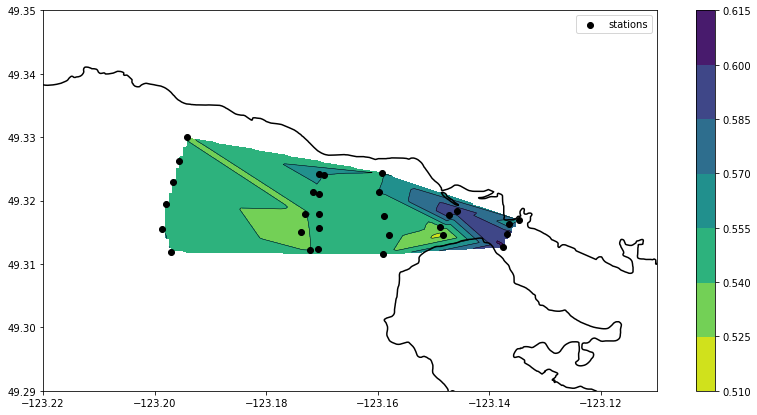

In [14]:
# Create grid values first.
ngridx = 100
ngridy = 100
xi = np.linspace(min(surface.lon),max(surface.lon), ngridx)
yi = np.linspace(min(surface.lat),max(surface.lat), ngridy)

#DENSITY
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
#zi = griddata((surface.lon[:24], surface.lat[:24]), surface.stream[:24], (xi[None, :], yi[:, None]), method='linear')
zi = griddata((surface.lon, surface.lat), surface.stream, (xi[None, :], yi[:, None]), method='linear')

fig, ax = plt.subplots(figsize=(14, 7))
plt.contour(xi, yi, zi, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, cmap="viridis_r")
plt.colorbar()

plt.xlim([-123.22, -123.11])
plt.ylim([49.29,49.35])
#plt.title('DENSITY\nTransect 4')

ax.plot(x, y, 'k')
ax.scatter(surface.lon, surface.lat, c='k', label='stations')
ax.set_aspect(5/4.4)
ax.legend()

In [15]:
## what if we did the same thing but only for the top 15 m
#create a new data frame with ONLY info from a depth of 0.75 dB to 15.25 db
Ps = np.arange(0.75,13.75,0.5)
top13 = pd.DataFrame({'transect': [df.transect[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'station': [df.station[i] for i in range(len(df)) if df.pressure[i] in Ps], 
         'lat': [df.lat[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'lon': [df.lon[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'depth': [df.depth[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'temperature': [df.temperature[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'salinity': [df.salinity[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'pressure':[df.pressure[i] for i in range(len(df)) if df.pressure[i] in Ps],
         'stream':[df['Stream Function'][i] for i in range(len(df)) if df.pressure[i] in Ps],
         'seadepth': [df.seadepth[i] for i in range(len(df)) if df.pressure[i] in Ps]})
top13;

In [16]:
DH = np.zeros([29,len(Ps)])

k=0
for i in range(29):
    for j in range(len(Ps)):
        DH[i,j] = top13.stream[k]
        k+=1
        
DH1 = DH[:sum(nSt[:1]),:]
DH2 = DH[nSt[0]:sum(nSt[:2]),:]
DH3 = DH[sum(nSt[:2]):sum(nSt[:3]),:]
DH4 = DH[sum(nSt[:3]):sum(nSt[:4]),:]
DH5 = DH[sum(nSt[:4]):sum(nSt[:5]),:]
DH6 = DH[sum(nSt[:5]):,:]

In [17]:
#the velocity result is perpendicular the the line connecting two points 
#SO in order to make it easily understandable in a figure the velocity of each transect much be done seperately

V1 = gsw.geostrophy.geostrophic_velocity(DH1.T,surface.lon.to_numpy()[:sum(nSt[:1])], surface.lat.to_numpy()[:sum(nSt[:1])], Ps.reshape(26,1), axis=0)
V2 = gsw.geostrophy.geostrophic_velocity(DH2.T,surface.lon.to_numpy()[nSt[0]:sum(nSt[:2])], surface.lat.to_numpy()[nSt[0]:sum(nSt[:2])], Ps.reshape(26,1), axis=0)
V3 = gsw.geostrophy.geostrophic_velocity(DH3.T,surface.lon.to_numpy()[sum(nSt[:2]):sum(nSt[:3])], surface.lat.to_numpy()[sum(nSt[:2]):sum(nSt[:3])], Ps.reshape(26,1), axis=0)
V4 = gsw.geostrophy.geostrophic_velocity(DH4.T,surface.lon.to_numpy()[sum(nSt[:3]):sum(nSt[:4])], surface.lat.to_numpy()[sum(nSt[:3]):sum(nSt[:4])], Ps.reshape(26,1), axis=0)
V5 = gsw.geostrophy.geostrophic_velocity(DH5.T,surface.lon.to_numpy()[sum(nSt[:4]):sum(nSt[:5])], surface.lat.to_numpy()[sum(nSt[:4]):sum(nSt[:5])], Ps.reshape(26,1), axis=0)
V6 = gsw.geostrophy.geostrophic_velocity(DH6.T,surface.lon.to_numpy()[sum(nSt[:5]):], surface.lat.to_numpy()[sum(nSt[:5]):], Ps.reshape(26,1), axis=0)

In [18]:
Vsur = [V1[0][0][i] for i in range(nSt[0]-1)]+[V2[0][0][i] for i in range(nSt[1]-1)]+[V3[0][0][i] for i in range(nSt[2]-1)]+[V4[0][0][i] for i in range(nSt[3]-1)]+[V5[0][0][i] for i in range(nSt[4]-1)]+[V6[0][0][i] for i in range(nSt[5]-1)]
midlon = [V1[1][i] for i in range(nSt[0]-1)]+[V2[1][i] for i in range(nSt[1]-1)]+[V3[1][i] for i in range(nSt[2]-1)]+[V4[1][i] for i in range(nSt[3]-1)]+[V5[1][i] for i in range(nSt[4]-1)]+[V6[1][i] for i in range(nSt[5]-1)]
midlat = [V1[2][i] for i in range(nSt[0]-1)]+[V2[2][i] for i in range(nSt[1]-1)]+[V3[2][i] for i in range(nSt[2]-1)]+[V4[2][i] for i in range(nSt[3]-1)]+[V5[2][i] for i in range(nSt[4]-1)]+[V6[2][i] for i in range(nSt[5]-1)]

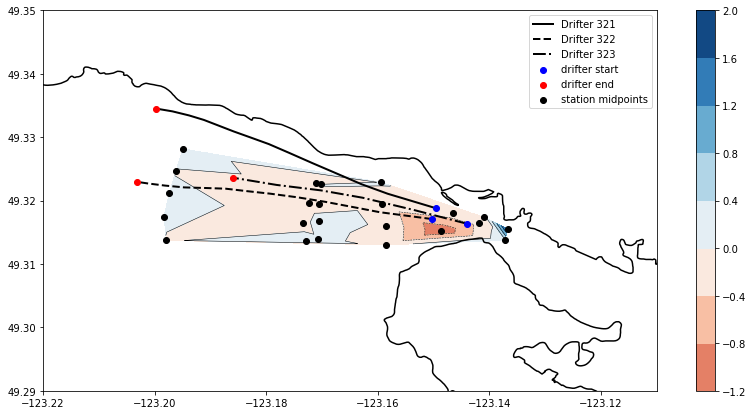

In [27]:
# Create grid values first.
ngridx = 1000
ngridy = 1000
xi = np.linspace(min(surface.lon),max(surface.lon), ngridx)
yi = np.linspace(min(surface.lat),max(surface.lat), ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
zi = griddata((midlon, midlat),Vsur, (xi[None, :], yi[:, None]), method='linear')

fig, ax = plt.subplots(figsize=(14, 7))
plt.contour(xi, yi, zi, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, cmap="RdBu", vmin=-2, vmax=2)
plt.colorbar()

# #ADD QUIVER plot
# ngridx = 15
# ngridy = 15
# xi = np.linspace(min(surface.lon),max(surface.lon), ngridx)
# yi = np.linspace(min(surface.lat),max(surface.lat), ngridy)

# # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
# zi = griddata((V[1], V[2]),Vsur, (xi[None, :], yi[:, None]), method='linear')
# dx,dy=np.gradient(zi) #gradient doesnt make sense as it amplifies the negative to postive changes
# plt.quiver(xi,yi,dx,dy)

#ADD drifters
plt.plot(drift[2].lon,drift[2].lat,'k-',label='Drifter '+str(drift[2].id),zorder=1, linewidth ='2')
plt.plot(drift[0].lon,drift[0].lat,'k--',label='Drifter '+str(drift[0].id),zorder=1, linewidth ='2')
plt.plot(drift[1].lon,drift[1].lat,'k-.',label='Drifter '+str(drift[1].id),zorder=1, linewidth ='2')
plt.scatter([drift[2].lon[0],drift[0].lon[0],drift[1].lon[0]],[drift[2].lat[0],drift[0].lat[0],drift[1].lat[0]],c='b', label='drifter start',zorder=2)
plt.scatter([drift[2].lon[-1],drift[0].lon[-1],drift[1].lon[-1]],[drift[2].lat[-1],drift[0].lat[-1],drift[1].lat[-1]],c='r', label='drifter end',zorder=2)
plt.legend()

plt.xlim([-123.22, -123.11])
plt.ylim([49.29,49.35])
#plt.title('DENSITY\nTransect 4')

ax.plot(x, y, 'k')
ax.scatter(midlon, midlat, c='k', label='station midpoints')
ax.set_aspect(5/4.4)
ax.legend()